C:\Users\faran\AppData\Local\Temp\ipykernel_18516\3890978452.py:24: RuntimeWarning: invalid value encountered in double_scalars
  diffraction_intensity = diffraction_factor * np.sin(2 * np.pi * closest_edge / wavelength) / (closest_edge / wavelength)
C:\Users\faran\AppData\Local\Temp\ipykernel_18516\3890978452.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  intensity = light_intensity / (distance**2)


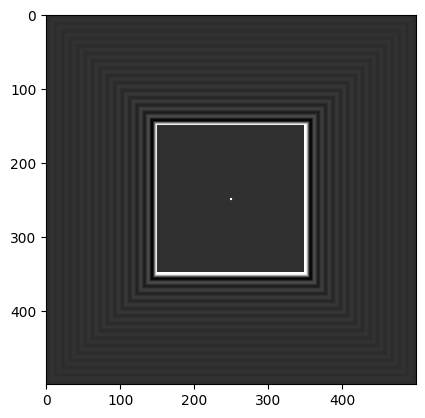

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scene
scene = np.zeros((500, 500))
scene[150:350, 150:350] = 1  # Add a square object

# Define the light source
light_position = (250, 250)
light_intensity = 1.0
wavelength = 10  # 파장 값 설정

# Define the material properties
diffraction_factor = 1.0  # 회절 강도 조절

# Raytracing function
def ray_trace(x, y):
    distance = np.sqrt((x - light_position[0])**2 + (y - light_position[1])**2)
    intensity = light_intensity / (distance**2)

    # Apply diffraction
    if scene[y, x] == 0:
        closest_edge = np.min([y - 150, 350 - y, x - 150, 350 - x])
        diffraction_intensity = diffraction_factor * np.sin(2 * np.pi * closest_edge / wavelength) / (closest_edge / wavelength)
        intensity += diffraction_intensity

    return intensity

# Render the scene
image = np.zeros((500, 500))
for y in range(500):
    for x in range(500):
        image[y, x] = ray_trace(x, y)

# Display the image
plt.imshow(image, cmap='gray')
plt.savefig('raytraced_image.png')
plt.show()

C:\Users\faran\AppData\Local\Temp\ipykernel_18516\1733299854.py:37: RuntimeWarning: invalid value encountered in double_scalars
  diffraction_intensity = diffraction_factor * np.sin(2 * np.pi * closest_edge / wavelength) / (closest_edge / wavelength)
C:\Users\faran\AppData\Local\Temp\ipykernel_18516\1733299854.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  reflected_intensity = light_intensity * reflection_factor / np.linalg.norm(reflected_ray)**2
C:\Users\faran\AppData\Local\Temp\ipykernel_18516\1733299854.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  intensity = light_intensity / distance_to_light**2  # Apply inverse-square falloff


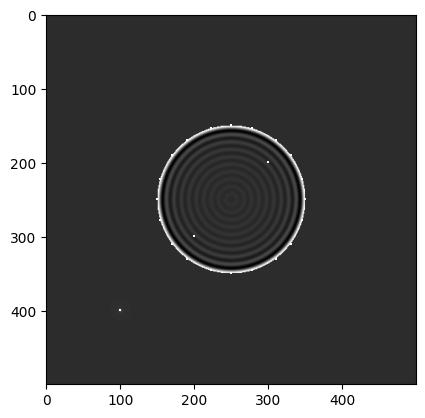

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scene
scene = np.zeros((500, 500))
sphere_center = (250, 250)
sphere_radius = 100

# Define the light source
light_position = (100, 400)
light_intensity = 1.0
wavelength = 10  # 파장 값 설정

# Define the material properties
diffraction_factor = 0.5  # 회절 강도 조절
reflection_factor = 0.8  # 반사 강도 조절

# Raytracing function
def ray_trace(x, y):
    # Calculate the distance to the sphere
    distance_to_sphere = np.sqrt((x - sphere_center[0])**2 + (y - sphere_center[1])**2)

    # Check if the ray hits the sphere
    if distance_to_sphere <= sphere_radius:
        # Calculate the normal vector at the intersection point
        normal = np.array([(x - sphere_center[0]) / sphere_radius, (y - sphere_center[1]) / sphere_radius])

        # Calculate the reflected ray direction
        incident_ray = np.array([x - light_position[0], y - light_position[1]])
        reflected_ray = incident_ray - 2 * np.dot(incident_ray, normal) * normal

        # Calculate the intensity of the reflected ray
        reflected_intensity = light_intensity * reflection_factor / np.linalg.norm(reflected_ray)**2

        # Apply diffraction
        closest_edge = sphere_radius - distance_to_sphere
        diffraction_intensity = diffraction_factor * np.sin(2 * np.pi * closest_edge / wavelength) / (closest_edge / wavelength)

        # Calculate the total intensity
        intensity = reflected_intensity + diffraction_intensity
    else:
        # Check if the ray is blocked by the sphere (shadow)
        distance_to_light = np.sqrt((x - light_position[0])**2 + (y - light_position[1])**2)
        if np.linalg.norm(np.array([x - sphere_center[0], y - sphere_center[1]])) < sphere_radius + distance_to_light:
            intensity = 0  # Ray is blocked by the sphere
        else:
            intensity = light_intensity / distance_to_light**2  # Apply inverse-square falloff

    return intensity

# Render the scene
image = np.zeros((500, 500))
for y in range(500):
    for x in range(500):
        image[y, x] = ray_trace(x, y)

# Display the image
plt.imshow(image, cmap='gray')
plt.savefig('raytraced_image.png')
plt.show()